In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
np.random.seed(1984)
%matplotlib inline
import pandas_datareader as dr
from datetime import date, datetime, timedelta
plt.style.use("ggplot")

In [3]:
# Utilizando random para genera números aleatorios.
import random
random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [4]:
random.random() # segundo llamado a random

0.49420568181919666

In [5]:
for i in range(6):
    print(random.random()) # 5 números aleatorios

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343
0.24405748180364206


In [6]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


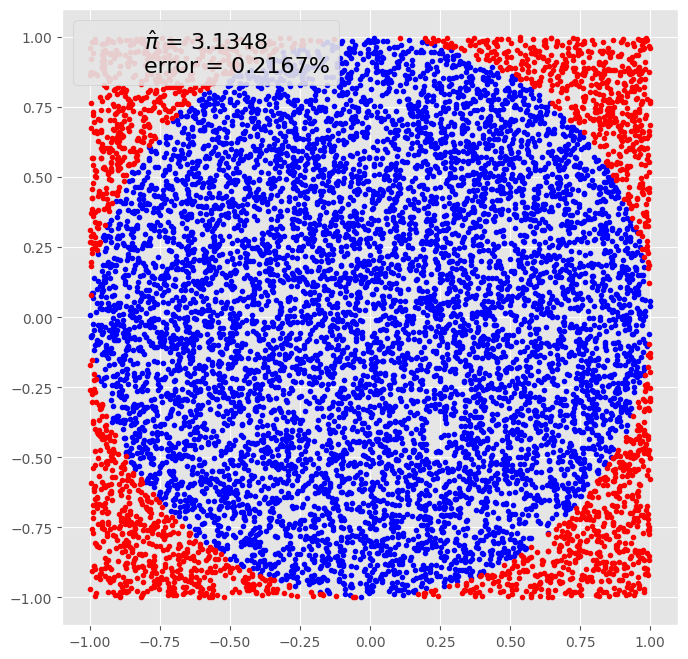

In [7]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.
#ENCUENTRA UNA APROXIMACIÓN A PI
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

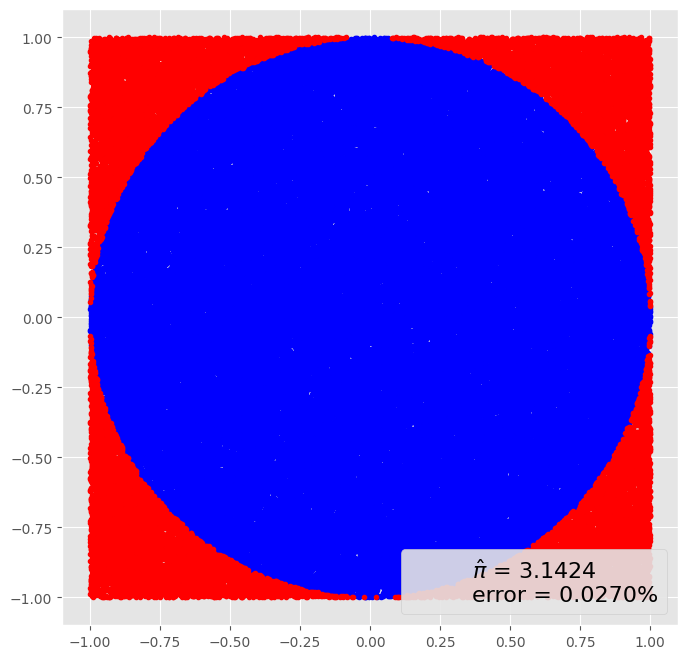

In [8]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

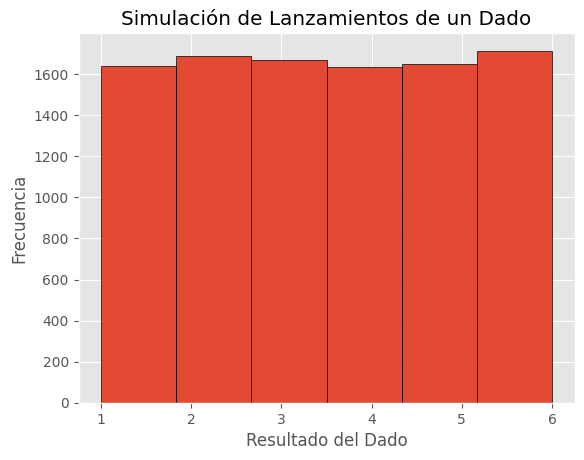

In [9]:
# Simulación de lanzamiento de un dado 10,000 veces
resultados = np.random.randint(1, 7, 10000)

# Visualización de resultados
plt.hist(resultados, bins=6, edgecolor='black')
plt.title('Simulación de Lanzamientos de un Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


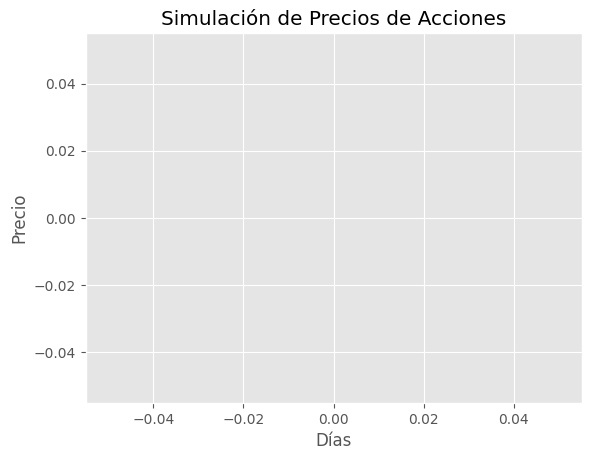

In [10]:
# Descargar datos de una acción
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
precios = data['Adj Close'].values

# Simular trayectorias de precios usando Monte Carlo
S0 = precios[-1]  # Precio inicial
T = 252  # Días en un año
mu = np.mean(np.diff(np.log(precios)))  # Rentabilidad media
sigma = np.std(np.diff(np.log(precios)))  # Volatilidad
n_simulaciones = 1000  # Número de simulaciones
trayectorias = np.zeros((T, n_simulaciones))

for i in range(n_simulaciones):
    trayectorias[:, i] = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) + sigma * np.random.normal(size=T)))

# Visualizar algunas trayectorias
for i in range(10):
    plt.plot(trayectorias[:, i])

plt.title('Simulación de Precios de Acciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.show()